# Titanic Survival Prediction using Machine Learning
The Titanic Survival Prediction project is a classic classification problem where we predict whether a passenger survived the Titanic disaster based on their attributes such as age, sex, class, etc.

## Problem Statement
The objective is to build a predictive model that classifies whether a passenger survived or not based on their features.

## Dataset Information
The dataset contains information about 891 passengers from the Titanic disaster, with 12 features, including:

## Importing the dependencies

In [943]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [944]:
df = pd.read_csv('titanic.csv')

In [945]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Information about the dataset

In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [947]:
df.shape

(891, 12)

In [948]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling the missing values

#### Drop the cabin feature from the data frame
We are doing this because the number of NAN values in the  cabin is a lot and unnecessary.

In [949]:
df = df.drop(columns = 'Cabin', axis = 1)

##### We can replace the NAN values of ages with the mean of age.

In [950]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

##### We can replace the NAN with the most repeated category 

In [951]:
print(df['Embarked'].mode()[0])

S


In [952]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [953]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have dealt with the missing values.

### EDA on the data for the better understanding of data

In [954]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Number of people survived and not survived

In [955]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [956]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

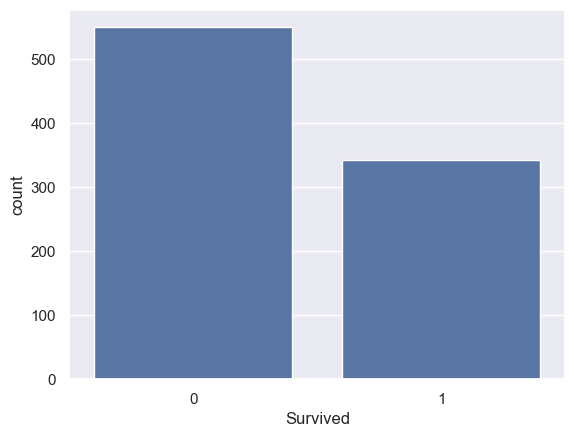

In [957]:
sns.countplot(x = 'Survived', data = df)

##### Checking the survivability with respect to gender

<Axes: xlabel='Sex', ylabel='count'>

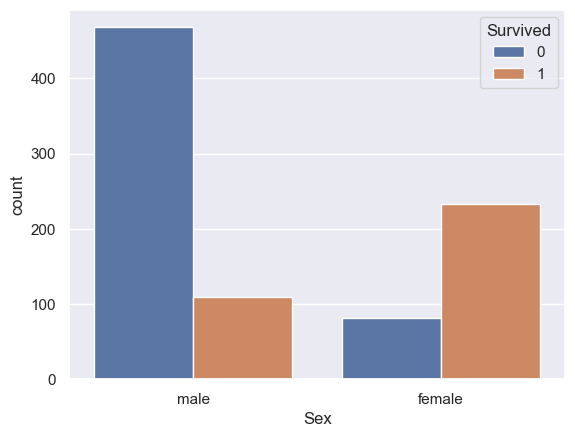

In [958]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

From this insight we can understand that more number of females survived as compared to males.

<Axes: xlabel='Pclass', ylabel='count'>

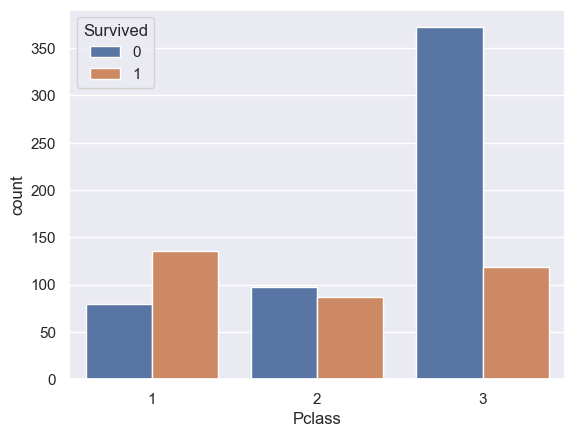

In [959]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

#### Encoding categorical columns

In [960]:
df = df.drop(columns = ['PassengerId','Name','Ticket'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [961]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [962]:
df['Sex'] = np.where(df['Sex'] == "male",1,0)
pd.set_option('future.no_silent_downcasting', True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


In [963]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


#### Survived feature will be our target , therefore we must seperate it from the other features

In [964]:
target = df['Survived']

In [965]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [966]:
df = df.drop(columns = ['Survived'], axis = 1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [967]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare','Pclass']]=scaler.fit_transform(df[['Age','Fare','Pclass']])

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,1,-0.592481,1,0,-0.502445,0
1,-1.566107,0,0.638789,1,0,0.786845,1
2,0.827377,0,-0.284663,0,0,-0.488854,0
3,-1.566107,0,0.407926,1,0,0.420730,0
4,0.827377,1,0.407926,0,0,-0.486337,0


### Splitting the test and training data

In [968]:
X_train, X_test, y_train, y_test = train_test_split(df,target, test_size = 0.2, random_state = 42,stratify=target)

In [969]:
print(X_train.shape)


(712, 7)


#### We will use Logistic Regression Model

In [ ]:
from sklearn.utils import class_weight
import numpy as np


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),  
    y=y_train
)


model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]},max_iter=1000)



In [971]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.8109339407744874, 1: 1.304029304029304},
                   max_iter=1000)

In [972]:
import pickle

with open("model.pkl",'wb') as file:
    pickle.dump(model,file)

In [973]:
# Accuracy of training data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [974]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_proba shape:", y_proba.shape)



X_test shape: (179, 7)
y_test shape: (179,)
y_pred shape: (179,)
y_proba shape: (179,)


In [975]:
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    classification_report
)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[90 20]
 [15 54]]
Accuracy: 0.8044692737430168
Precision: 0.7297297297297297
Recall: 0.782608695652174
F1-Score: 0.7552447552447552
ROC-AUC Score: 0.8420289855072464

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



##### The accuracy score for test data and training data are 78% and 80% which are very close and tell us that our model is well generalising. Therefore our model is perpared.

## Result Visualization

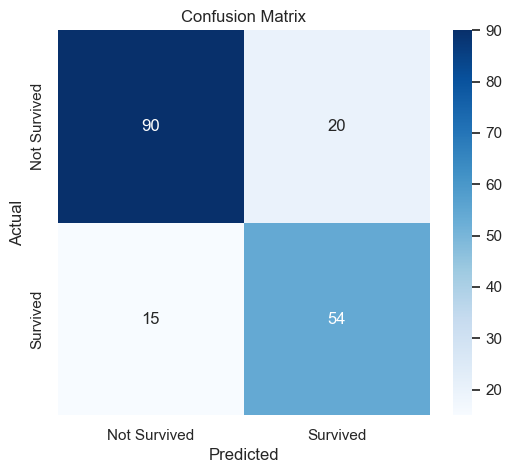

In [976]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


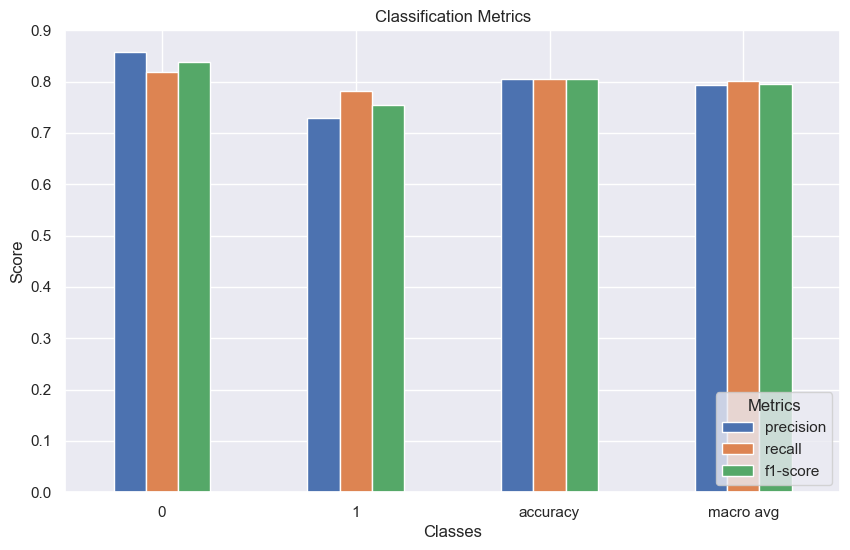

In [977]:
from sklearn.metrics import classification_report
import pandas as pd

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the metrics
report_df.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 6))
plt.title("Classification Metrics")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics", loc="lower right")
plt.show()


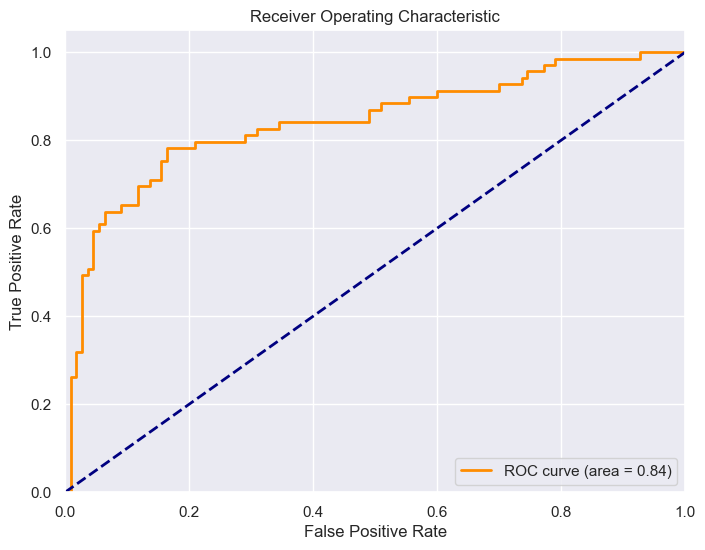

In [978]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


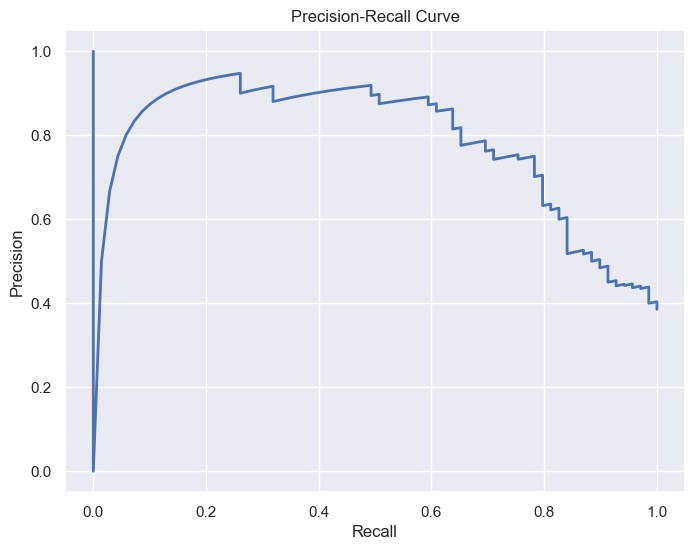

In [979]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
